In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

# Dataset 1: Wine

https://archive.ics.uci.edu/dataset/109/wine

In [2]:
df = pd.read_csv('wine_clustering.csv')

In [3]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

## k-means clustering

### normalisation

In [6]:
cols = df.columns

In [7]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df = mms.fit_transform(df)
df = pd.DataFrame(df, columns=[cols])

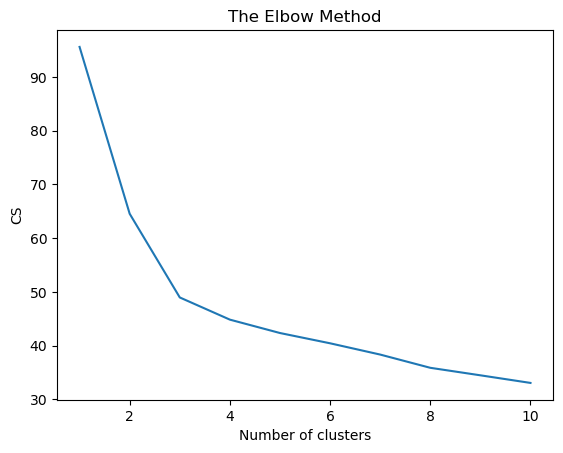

In [8]:
from sklearn.cluster import KMeans

cs = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df)
    cs.append(kmeans.inertia_)
    
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

### modelling k=3

In [9]:
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(df)

labels = kmeans.labels_

In [10]:
labels_p = pd.DataFrame(labels, columns=['label'])

### visualisation

In [11]:
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

In [12]:
results = pd.concat([results, labels_p], axis=1)
results

,pca1,pca2,label
0,-0.706336,-0.253193,1
1,-0.484977,-0.008823,1
2,-0.521172,-0.189187,1
3,-0.821644,-0.580906,1
4,-0.202546,-0.059467,1
...,...,...,...
173,0.739510,-0.471901,0
174,0.581781,-0.348366,0
175,0.626313,-0.546857,0
176,0.572991,-0.425516,0


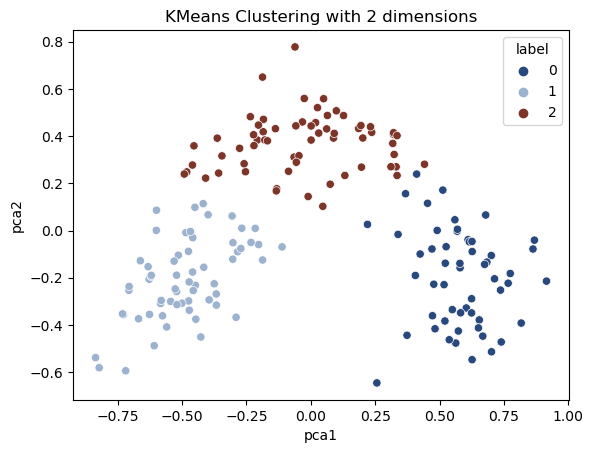

In [13]:
pal = ["#29487D", "#9CB2CE", "#7d3429"]
sns.scatterplot(x="pca1", y="pca2", hue=results['label'], data=results, palette=pal)
plt.title('KMeans Clustering with 2 dimensions')
plt.show()

## Real labels

In [14]:
df = pd.read_csv('wine_clustering.csv')

In [15]:
cols = df.columns

In [16]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df = mms.fit_transform(df)
df = pd.DataFrame(df, columns=[cols])

In [17]:
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

In [18]:
from ucimlrepo import fetch_ucirepo 

wine = fetch_ucirepo(id=109) 
y = wine.data.targets 

In [19]:
results = pd.concat([results, y], axis=1)
results

,pca1,pca2,class
0,-0.706336,-0.253193,1
1,-0.484977,-0.008823,1
2,-0.521172,-0.189187,1
3,-0.821644,-0.580906,1
4,-0.202546,-0.059467,1
...,...,...,...
173,0.739510,-0.471901,3
174,0.581781,-0.348366,3
175,0.626313,-0.546857,3
176,0.572991,-0.425516,3


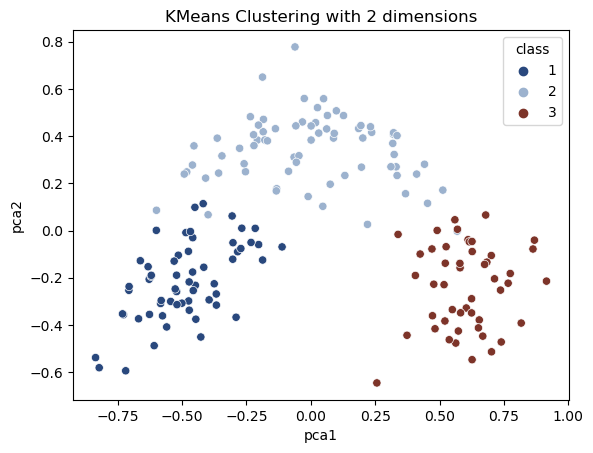

In [20]:
pal = ["#29487D", "#9CB2CE", "#7d3429"]
sns.scatterplot(x="pca1", y="pca2", hue=results['class'], data=results, palette=pal)
plt.title('KMeans Clustering with 2 dimensions')
plt.show()

# Dataset 2: Facebook Live Sellers

https://archive.ics.uci.edu/dataset/488/facebook+live+sellers+in+thailand

## Preprocessing

In [21]:
df = pd.read_csv('FB_live_sellers.csv')

In [22]:
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [23]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [24]:
# num_reactions = num_likes+num_loves+num_wows+num_hahas+num_sads+num_angrys
df['total_reactions'] = df['num_likes']+df['num_loves']+df['num_wows']+df['num_hahas']+df['num_sads']+df['num_angrys']
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,total_reactions
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,529
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,150
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,227
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,111
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,213
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,89
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,16
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,2
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,351


In [25]:
df[df['num_reactions']!=df['total_reactions']]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,total_reactions
238,239,video,6/25/2017 7:42,885,462,26,659,220,0,2,0,0,881
247,248,photo,6/13/2017 23:17,264,2,0,256,2,5,0,0,0,263
248,249,photo,6/13/2017 1:31,313,3,0,297,7,6,0,0,0,310
251,252,photo,6/12/2017 5:08,247,6,0,234,9,1,0,0,0,244
253,254,photo,6/11/2017 7:04,387,3,0,368,16,1,0,0,0,385
254,255,photo,6/10/2017 8:19,178,9,0,170,6,0,0,0,0,176
256,257,photo,6/10/2017 1:08,270,3,0,256,10,3,0,0,0,269
257,258,photo,6/8/2017 9:26,351,4,1,344,6,0,0,0,0,350
293,294,video,4/20/2017 2:36,616,523,21,459,125,21,8,0,1,614


In [26]:
# inconsistency -> remove
df.drop(df[df['num_reactions']!=df['total_reactions']].index, inplace=True)
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,total_reactions
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,529
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,150
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,227
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,111
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,213
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,89
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,16
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,2
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,351


In [27]:
df = df.reset_index()

In [28]:
df.drop(['total_reactions', 'index'], axis=1, inplace=True)

In [29]:
# new features, positive vs negative
# positive reactions : likes, loves, wows
# negative reactions : hahas, angrys, sads
df['num_pos'] = df['num_likes']+df['num_loves']+df['num_wows']
df['num_neg'] = df['num_hahas']+df['num_angrys']+df['num_sads']

In [30]:
# label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['status_type'] = le.fit_transform(df['status_type'])

In [31]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [32]:
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,num_pos,num_neg
0,3,529,512,262,432,92,3,1,1,0,527,2
1,1,150,0,0,150,0,0,0,0,0,150,0
2,3,227,236,57,204,21,1,1,0,0,226,1
3,1,111,0,0,111,0,0,0,0,0,111,0
4,1,213,0,0,204,9,0,0,0,0,213,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7036,1,89,0,0,89,0,0,0,0,0,89,0
7037,1,16,0,0,14,1,0,1,0,0,15,1
7038,1,2,0,0,1,1,0,0,0,0,2,0
7039,1,351,12,22,349,2,0,0,0,0,351,0


In [33]:
cols = df.columns

In [34]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df = mms.fit_transform(df)
df = pd.DataFrame(df, columns=[cols])

## k-means clustering

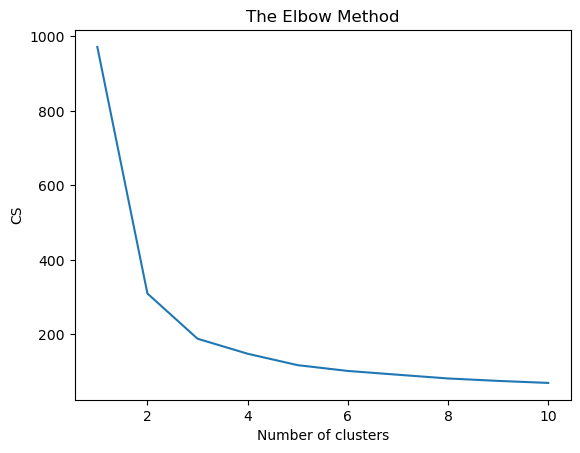

In [35]:
cs = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df)
    cs.append(kmeans.inertia_)
    
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

### modelling k=2

In [36]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(df)

labels = kmeans.labels_

In [37]:
labels = pd.DataFrame(labels, columns=['label'])

In [38]:
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

In [39]:
results = pd.concat([results, labels], axis=1)

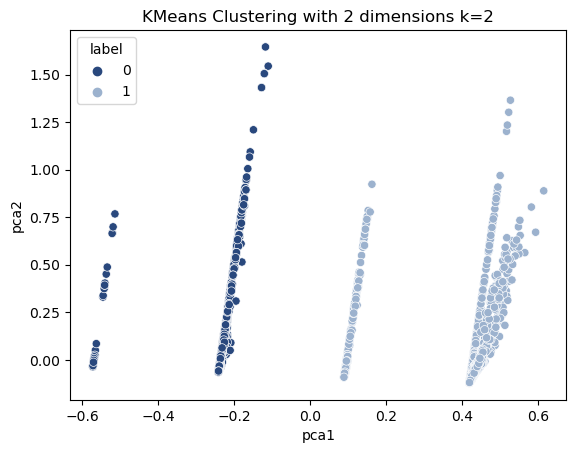

In [40]:
pal = ["#29487D", "#9CB2CE"]
sns.scatterplot(x="pca1", y="pca2", hue=results['label'], data=results, palette=pal)
plt.title('KMeans Clustering with 2 dimensions k=2')
plt.show()

### modelling k=4

In [41]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(df)

labels = kmeans.labels_

In [42]:
labels = pd.DataFrame(labels, columns=['label'])

In [43]:
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

In [44]:
results = pd.concat([results, labels], axis=1)

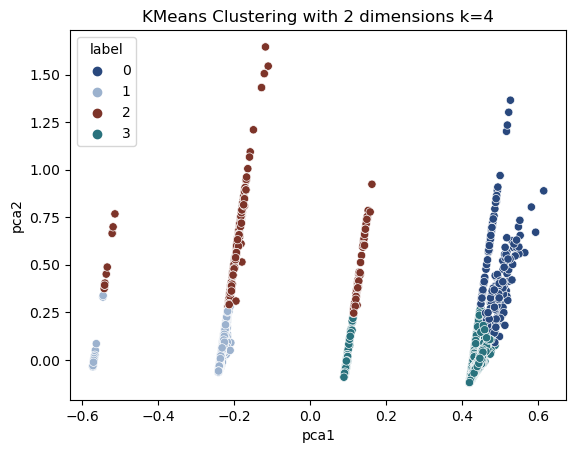

In [45]:
pal = ["#29487D", "#9CB2CE", "#7d3429", "#29727d"]
sns.scatterplot(x="pca1", y="pca2", hue=results['label'], data=results, palette=pal)
plt.title('KMeans Clustering with 2 dimensions k=4')
plt.show()